In [1]:
!pip install matplotlib seaborn pandas python-dotenv

DEPRECATION: Loading egg at /opt/homebrew/lib/python3.11/site-packages/d2l-1.0.0b0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /opt/homebrew/lib/python3.11/site-packages/gpytorch-1.11-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 5.8 MB/s eta 0:00:00 MB/s eta 0:00:01
DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specif

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dotenv
import os
import json
from message import Message
from data_load import load_messages_from_directory

# Ensure that visuals appear inline in the notebook
%matplotlib inline


/Users/Bryson/Desktop/Programming/PugTech/LeadershipShhhhBackup/messages
Loading message_2.json
Loading message_3.json
Loading message_4.json
Loading message_5.json
Loading message_6.json
Loading message_1.json
57856 56088
Sender: Tindell Lockett
Timestamp: February 08, 2020 12:16.13 PM UTC-05:00
Message: Two: there's already too much money in there. Our immediate competitors would be: Google, Facebook, Microsoft, Xi Jinping, Uber, every trust fund, every college, and every political party


In [2]:
dotenv.load_dotenv()

messages_folder = os.getenv("MESSAGES_FOLDER_PATH")

messages, text_messages = load_messages_from_directory(messages_folder)
print(len(messages), len(text_messages))
print(messages[0])

Loading message_2.json
Loading message_3.json
Loading message_4.json
Loading message_5.json
Loading message_6.json
Loading message_1.json
57856 56088
Sender: Tindell Lockett
Timestamp: February 08, 2020 12:16.13 PM UTC-05:00
Message: Two: there's already too much money in there. Our immediate competitors would be: Google, Facebook, Microsoft, Xi Jinping, Uber, every trust fund, every college, and every political party


In [3]:
data = []

for message in messages:
    data.append({"sender": message.sender, "content": message.content, "timestamp": message.timestamp, "type": message.message_type})

df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

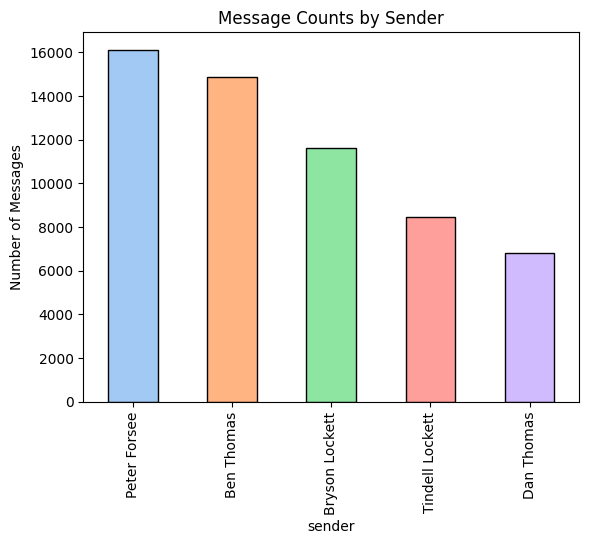

In [4]:
message_counts = df['sender'].value_counts()
message_counts.plot(kind='bar', color=sns.color_palette("pastel"), edgecolor='black')
plt.title("Message Counts by Sender")
plt.ylabel("Number of Messages")
plt.show()

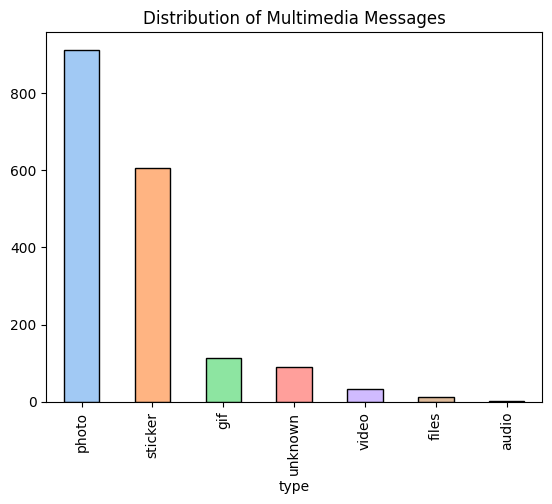

In [22]:
# Identify the dominant category
dominant_category = type_counts.idxmax()

# Remove the dominant category from the counts
filtered_type_counts = type_counts[type_counts.index != dominant_category]

filtered_type_counts.plot(kind='bar', color=sns.color_palette("pastel"), edgecolor='black')
plt.title("Distribution of Multimedia Messages")
plt.ylabel("")
plt.show()

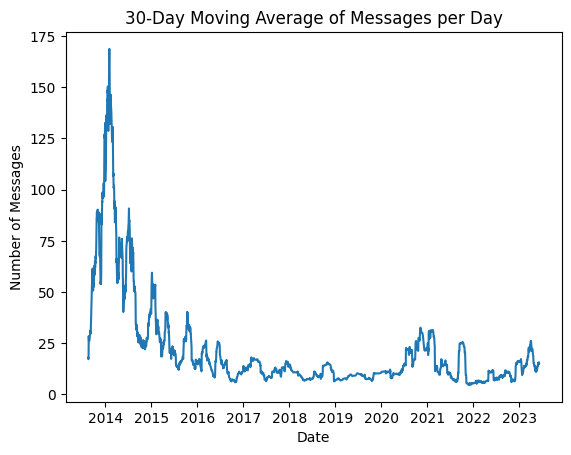

In [24]:
# Extract the date from the timestamp
df['date'] = df['timestamp'].dt.date

# Group by date and count messages
messages_over_time = df.groupby('date').size()

# Compute the 30-day moving average
moving_avg = messages_over_time.rolling(window=30).mean()

# Plot the moving average
moving_avg.plot()
plt.title("30-Day Moving Average of Messages per Day")
plt.ylabel("Number of Messages")
plt.xlabel("Date")
plt.show()


sender
Ben Thomas         135
Bryson Lockett     206
Dan Thomas         148
Peter Forsee       180
Tindell Lockett    243
Name: content, dtype: int64


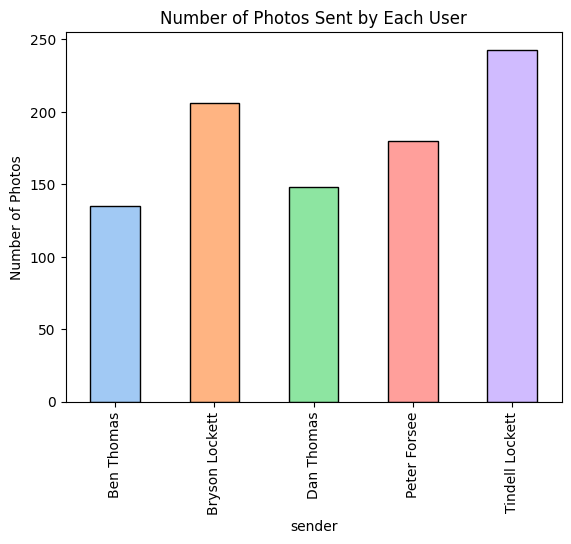

In [11]:
photo_df = df[df['type'] == 'photo']
photo_counts = photo_df.groupby('sender')['content'].count()
photo_counts.plot(kind='bar', color=sns.color_palette("pastel"), edgecolor='black')
plt.title("Number of Photos Sent by Each User")
plt.ylabel("Number of Photos")
plt.show()

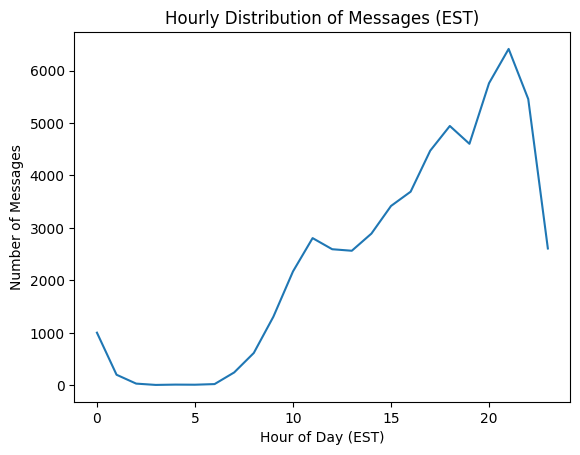

In [25]:
# Convert to EST timezone
df['timestamp_est'] = df['timestamp'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')

# Extract hour in EST
df['hour_est'] = df['timestamp_est'].dt.hour

hourly_distribution = df.groupby('hour_est').size()
hourly_distribution.plot()
plt.title("Hourly Distribution of Messages (EST)")
plt.ylabel("Number of Messages")
plt.xlabel("Hour of Day (EST)")
plt.show()

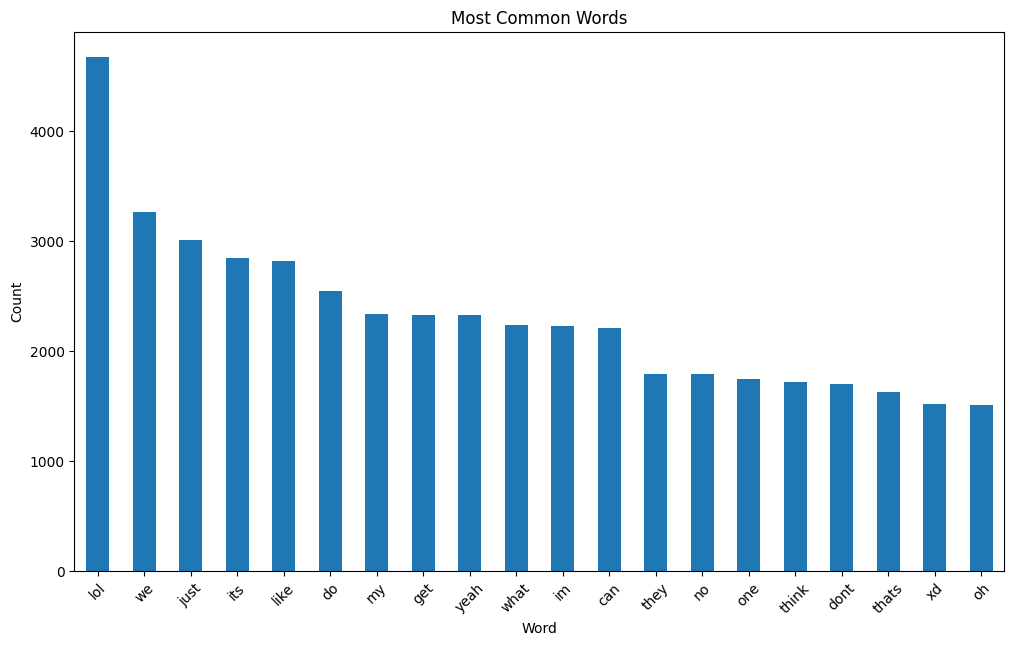

    Word  Count
0    lol   4669
1     we   3260
2   just   3011
3    its   2842
4   like   2814
..   ...    ...
95  play    555
96   use    543
97  does    542
98  over    521
99  here    519

[100 rows x 2 columns]


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import string

# Sample stop words, you can extend this list or use libraries like nltk for a comprehensive list
stop_words = set([
    'and', 'the', 'to', 'of', 'in', 'is', 'you', 'that', 'it', 'for', 'on', 'with', 'as', 'this', 'was', 'are', 'or', 'not', 'be', 'have', 'by', 'at', 'from', 'an', 'if', 'has', 'but', 'so', 'there', 'i', 'a'
])

text_df = df[df['type'] == 'text']

# Pre-process the data
words = []
for message in text_df['content']:
    # Convert to lowercase and remove punctuation
    cleaned_message = message.lower().translate(str.maketrans('', '', string.punctuation))
    words.extend(word for word in cleaned_message.split() if word not in stop_words)

# Count the words
word_counts = Counter(words)

# Get the most common words
common_words = word_counts.most_common(200)

# Convert to DataFrame for easier plotting
word_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot
plt.figure(figsize=(12, 7))
word_df[:20].set_index('Word').plot(kind='bar', legend=False, ax=plt.gca()) # change the indexing ([:20]) to change the number of words
plt.title('Most Common Words')
plt.ylabel('Count')
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.show()

print(word_df.head(100))

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


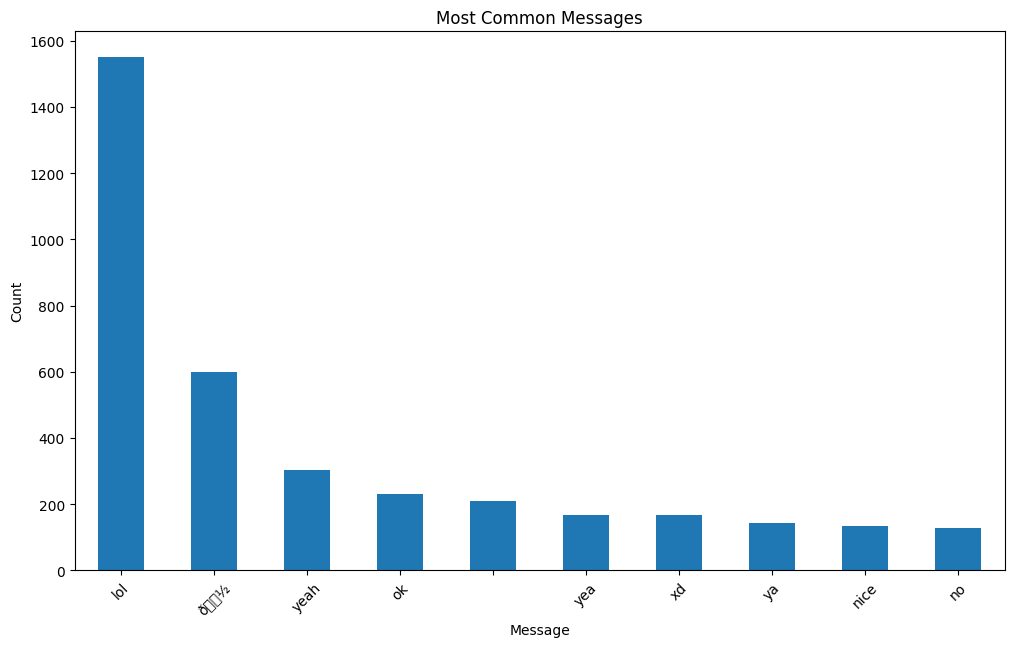

  Message  Count
0     lol   1551
1    ð½    601
2    yeah    302
3      ok    231
4            211
5     yea    167
6      xd    167
7      ya    144
8    nice    135
9      no    128


In [55]:
text_df = df[df['type'] == 'text']

# Pre-process the data
messages = []
long_messages = []
for message in text_df['content']:
    # Convert to lowercase and remove punctuation
    cleaned_message = message.lower().translate(str.maketrans('', '', string.punctuation)).strip()
    messages.append(cleaned_message)
    if message.count(' ') > 3:
        long_messages.append(cleaned_message)

# Count the messages
message_counts = Counter(messages)

# Get the most common messages
common_messages = message_counts.most_common(200)

# Convert to DataFrame for easier plotting
message_df = pd.DataFrame(common_messages, columns=['Message', 'Count'])

# Plot
plt.figure(figsize=(12, 7))
message_df[:10].set_index('Message').plot(kind='bar', legend=False, ax=plt.gca())
plt.title('Most Common Messages')
plt.ylabel('Count')
plt.xlabel('Message')
plt.xticks(rotation=45)
plt.show()

print(message_df.head(10))

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 152 (\x98) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 134 (\x86) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


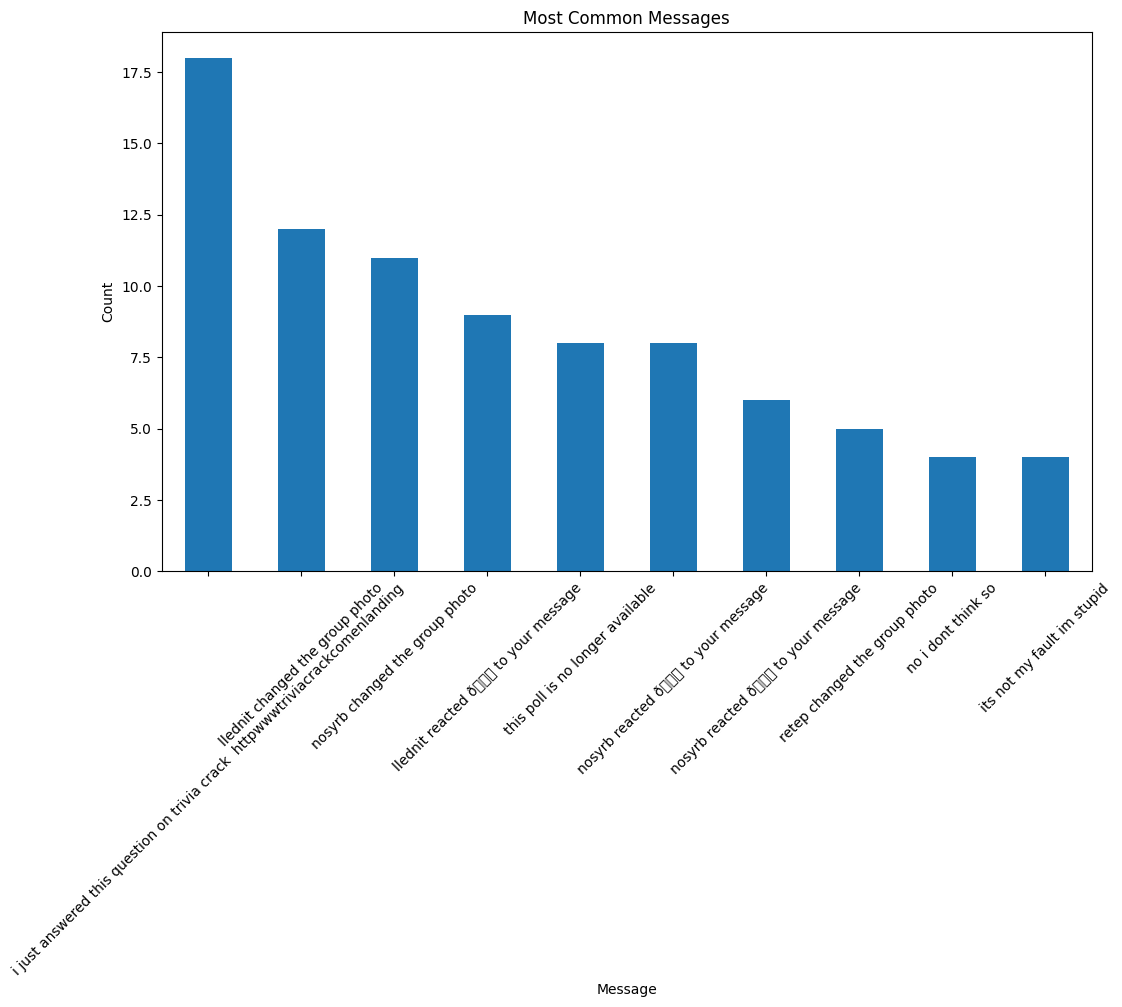

                                             Message  Count
0  i just answered this question on trivia crack ...     18
1                    llednit changed the group photo     12
2                     nosyrb changed the group photo     11
3               llednit reacted ð to your message      9
4                   this poll is no longer available      8
5                nosyrb reacted ð to your message      8
6                nosyrb reacted ð to your message      6
7                      retep changed the group photo      5
8                                 no i dont think so      4
9                         its not my fault im stupid      4


In [56]:
# (must run the above frame first)

# Count the long messages
long_message_counts = Counter(long_messages)

# Get the most common messages
common_messages = long_message_counts.most_common(200)

# Convert to DataFrame for easier plotting
message_df = pd.DataFrame(common_messages, columns=['Message', 'Count'])

# Plot
plt.figure(figsize=(12, 7))
message_df[:10].set_index('Message').plot(kind='bar', legend=False, ax=plt.gca())
plt.title('Most Common Messages')
plt.ylabel('Count')
plt.xlabel('Message')
plt.xticks(rotation=45)
plt.show()

print(message_df.head(10))

In [50]:
# Extract date from timestamp and count messages per day
messages_per_day = df.groupby('date').size()

# Total Messages
total_messages = len(df)

# Active Days
active_days = messages_per_day.count()

# Duration
duration = (df['timestamp'].max() - df['timestamp'].min()).days + 1  # +1 to include both start and end day

# Most Messages in a Day
most_messages_in_a_day = messages_per_day.max()

# Average Messages per Day
avg_messages_per_day = total_messages / duration

# Messages per Active Day
avg_messages_per_active_day = total_messages / active_days

# Most and Least Active Senders
sender_counts = df['sender'].value_counts()
most_active_sender = sender_counts.idxmax()
least_active_sender = sender_counts.idxmin()

# Display
print(f"Total Messages: {total_messages}")
print(f"Active Days: {active_days}")
print(f"Duration (days between first and last message): {duration}")
print(f"Most Messages in a Day: {most_messages_in_a_day}")
print(f"Average Messages per Day: {avg_messages_per_day:.2f}")
print(f"Average Messages per Active Day: {avg_messages_per_active_day:.2f}")
print(f"Most Active Sender: {most_active_sender} with {sender_counts.max()} messages")
print(f"Least Active Sender: {least_active_sender} with {sender_counts.min()} messages")

# Day with Most Messages
day_with_most_messages = messages_per_day.idxmax()

# Filter messages from that day
messages_on_max_day = df[df['date'] == day_with_most_messages]

# Displaying a few messages from that day
sample_messages = messages_on_max_day.sample(20)  # Change this number if you want more/less messages

print(f"\n\nDay with Most Messages: {day_with_most_messages.strftime('%Y-%m-%d')}")
print("Sample Messages:")
for idx, row in sample_messages.iterrows():
    print(f"{row['timestamp'].strftime('%Y-%m-%d %H:%M:%S')} - {row['sender']}: {row['content']}")


Total Messages: 57856
Active Days: 2135
Duration (days between first and last message): 3696
Most Messages in a Day: 830
Average Messages per Day: 15.65
Average Messages per Active Day: 27.10
Most Active Sender: Peter Forsee with 16125 messages
Least Active Sender: Dan Thomas with 6793 messages


Day with Most Messages: 2013-12-01
Sample Messages:
2013-12-01 01:17:32 - Bryson Lockett: 14% or so I think 
2013-12-01 23:35:45 - Peter Forsee: Alright I'm back had to bring in groceries
2013-12-01 04:58:28 - Bryson Lockett: Theater 
2013-12-01 00:59:22 - Bryson Lockett: At least it gets you someplace 
2013-12-01 04:31:56 - Bryson Lockett: Peter the problem is we'd all like the same girl. Except Ben 
2013-12-01 05:28:51 - Bryson Lockett: ð°ó¾®
2013-12-01 04:48:53 - Ben Thomas: hahaha collective add lets get that diagnosed
2013-12-01 04:09:58 - Tindell Lockett: Peter, Ben has a crush on you
2013-12-01 05:01:35 - Tindell Lockett: Now im a believer 
2013-12-01 22:13:36 - Peter Forsee: Peeta b

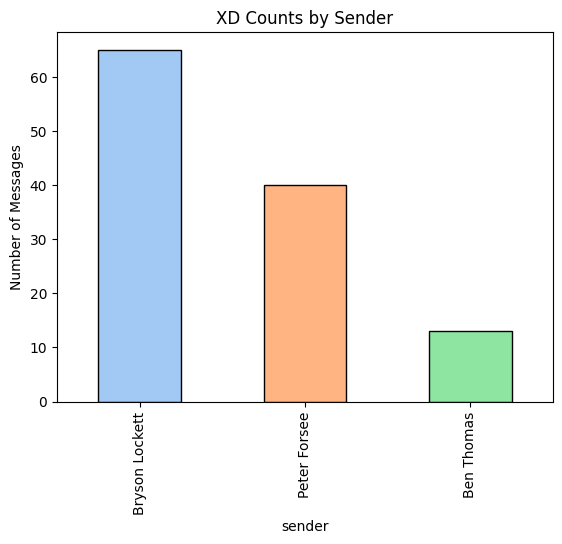

In [64]:
xd_df = df[(df['type'] == 'text') & ((df['content'] == 'xd') | (df['content'] == 'XD') | (df['content'] == 'xD') | (df['content'] == 'XD'))]

message_counts = xd_df['sender'].value_counts()
message_counts.plot(kind='bar', color=sns.color_palette("pastel"), edgecolor='black')
plt.title("XD Counts by Sender")
plt.ylabel("Number of Messages")
plt.show()